In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
from ipywidgets import interactive, Button
import plotly.graph_objs as go



In [2]:
import os
import pandas as pd
sampling_freq=10

def load_excel_files(folder_path):
    # List to store DataFrames from each Excel file
    dfs = []

    # Iterate over each file in the folder
    for file in os.listdir(folder_path):
        if file.endswith('.csv'):
            # Read Excel file into DataFrame
            df = pd.read_csv(os.path.join(folder_path, file), encoding='latin1')
            dfs.append(df)     #dfs is a list (assumed to be defined earlier) that stores DataFrames.

    # Combine all DataFrames into a single DataFrame
    combined_df = pd.concat(dfs, ignore_index=True)
    return combined_df

def create_target_column(df):
    # Create a new column "Target" based on defect types
    df['Target'] = 0
    df.loc[df['Cracking'] == 1, 'Target'] = 1
    df.loc[df['Patching'] == 1, 'Target'] = 2
    df.loc[df['Potholes'] == 1, 'Target'] = 3
    return df

# Folder path containing Excel files
folder_path = r'C:\Users\kayna\OneDrive\Desktop\Transtek - Bridge Monitoring Connected Vehicles\RSM\2024 03 07 Oviedo Pavement Data\2024 03 07 Oviedo Pavement Data\traindata2'

# Load Excel files into a single DataFrame
combined_df = load_excel_files(folder_path)

# Create "Target" column based on defect types
combined_df = create_target_column(combined_df)

# Extract columns "H_RSM" and "Target"
final_df = combined_df[['H_RSM', 'Target']]

# Display final DataFrame
final_df

,H_RSM,Target
0,0.000000,0
1,0.000000,0
2,0.000000,0
3,0.000000,0
4,0.000000,0
...,...,...
22305,564.519636,0
22306,543.735683,0
22307,525.030124,0
22308,508.195122,0


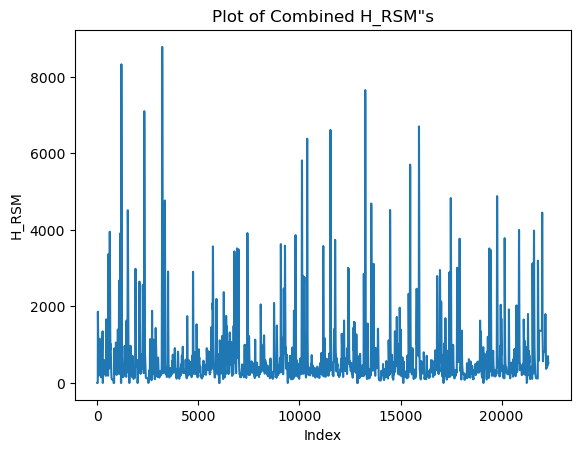

In [3]:
import matplotlib.pyplot as plt

# Plot the "H_RSM" column
final_df['H_RSM'].plot() 
plt.xlabel('Index')
plt.ylabel('H_RSM')
plt.title('Plot of Combined H_RSM"s')
plt.show()

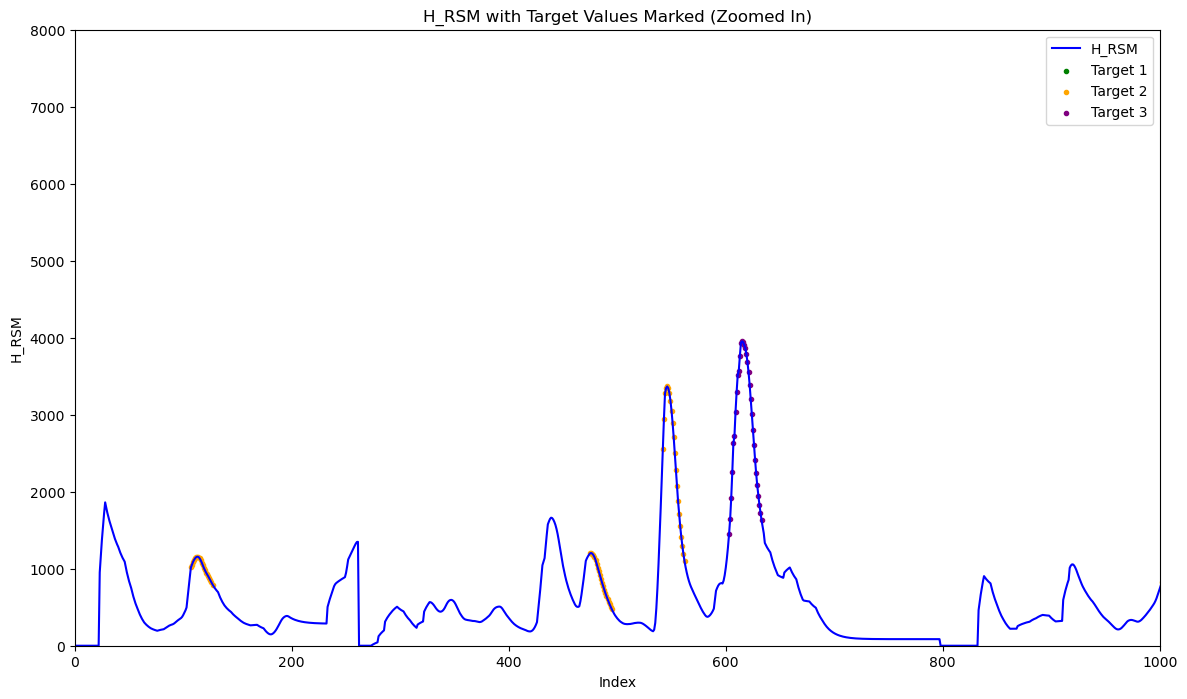

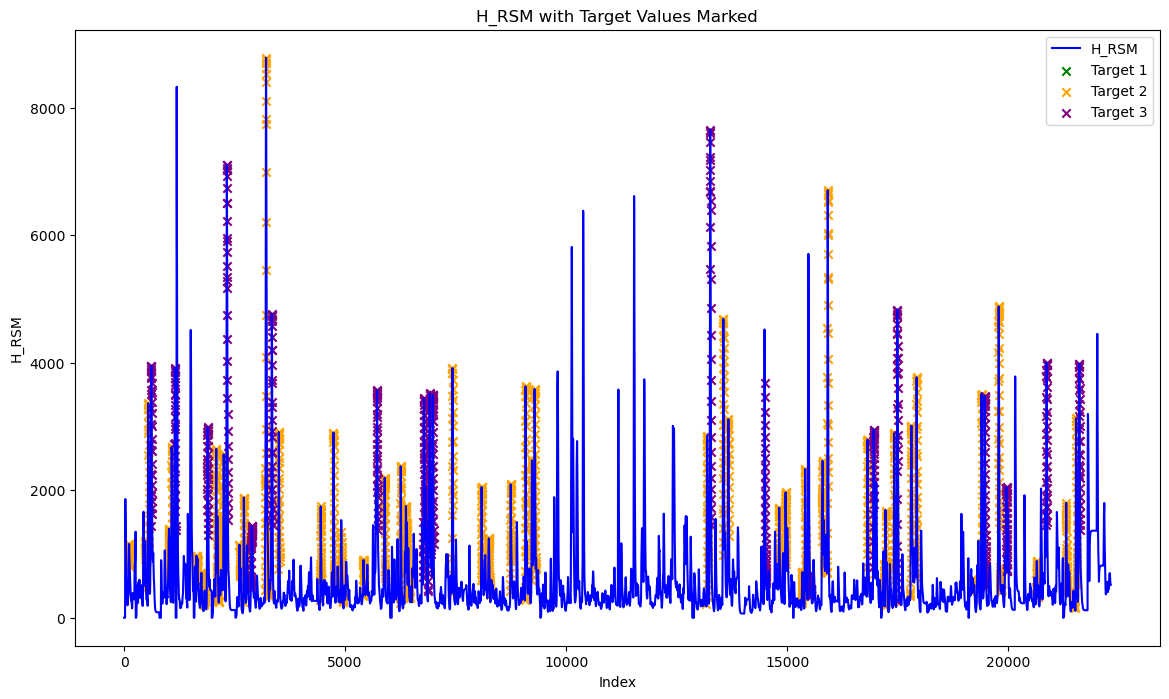

In [4]:
# Function to plot H_RSM and mark target values
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_H_RSM_with_targets(df):
    plt.figure(figsize=(14, 8))
    
    # Plot H_RSM
    plt.plot(df['H_RSM'], label='H_RSM', color='blue')
    
    # Mark different target values
    colors = {1: 'green', 2: 'orange', 3: 'purple'}
    for target_value, color in colors.items():
        indices = df[df['Target'] == target_value].index
        plt.scatter(indices, df['H_RSM'].iloc[indices], color=color, label=f'Target {target_value}', marker='x')
    
    plt.xlabel('Index')
    plt.ylabel('H_RSM')
    plt.title('H_RSM with Target Values Marked')
    plt.legend()
    plt.show()

# Function to zoom in on a specific section of the plot
def zoom_plot(df, xmin, xmax, ymin=None, ymax=None):
    plt.figure(figsize=(14, 8))
    
    # Plot H_RSM
    plt.plot(df['H_RSM'], label='H_RSM', color='blue')
    
    # Mark different target values
    colors = {1: 'green', 2: 'orange', 3: 'purple'}
    for target_value, color in colors.items():
        indices = df[df['Target'] == target_value].index
        plt.scatter(indices, df['H_RSM'].iloc[indices], color=color, label=f'Target {target_value}', marker='.')
    
    plt.xlabel('Index')
    plt.ylabel('H_RSM')
    plt.title('H_RSM with Target Values Marked (Zoomed In)')
    plt.legend()
    
    # Set zoom range
    plt.xlim(xmin, xmax)
    if ymin is not None and ymax is not None:
        plt.ylim(ymin, ymax)
    
    plt.show()

# Example of zooming in (customize the indices and range as needed)
zoom_plot(final_df, 0, 1000, 0, 8000)  # Adjust the range as necessary

# Plot the data
plot_H_RSM_with_targets(final_df)

In [5]:
def increase_consecutive_values(df):
    # Initialize a counter to keep track of consecutive values
    count = 1

    # Iterate over rows in the DataFrame
    for i in range(1,len(df)-1):
        # Check if the current value is 1, 2, or 3
        if df.loc[i, 'Target'] in [0,1, 2, 3]:
            # Check if the current value is equal to the next value
            if df.loc[i, 'Target'] in (1,2,3) and (df.loc[i, 'Target'] == df.loc[i + 1, 'Target'] or df.loc[i, 'Target'] == df.loc[i - 1, 'Target']):
                # Increment the counter
                count += 1
                print(count)
                if count==2:
                  df.loc[i-3:i+1, 'Target'] = df.loc[i, 'Target']
            else:
                # If the counter is greater than 1, repeat the value for the consecutive sequence
                if count > 1:
                    df.loc[i, 'Target'] = df.loc[i - 1, 'Target']
                # Reset the counter
                    count -= 1
                    print(count)
                else:
                    continue
            
    return df

# Apply the function to increase consecutive values by 2 for values 1, 2, and 3
modified_df = increase_consecutive_values(final_df)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15

In [6]:
#input_data = [0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,2,2,0,2,2,0,0,0,0,0,0,0,0,3,3,3,0,0,0,0,0]
#df = pd.DataFrame({'Target': input_data})

#modified_df = increase_consecutive_values(df)
#print(modified_df['Target'].tolist())

In [7]:
import numpy as np
import pandas as pd

# Function to find local minima in the time series
def find_local_minima(time_series):
    # Shift the series to get the elements before, current, and after each element
    previous_elements = time_series[:-2]
    current_elements = time_series[1:-1]
    next_elements = time_series[2:]
    
    # Find where current elements are less than both previous and next elements
    local_minima_mask = (previous_elements > current_elements) & (current_elements < next_elements)
    
    # Get the indices of these local minima
    local_minima_indices = np.where(local_minima_mask)[0] + 1
    
    return local_minima_indices

# Function to find local maxima in the time series
def find_local_maxima(time_series):
    local_maxima_indices = np.where((time_series[:-2] < time_series[1:-1]) & (time_series[1:-1] > time_series[2:]))[0] + 1
    return local_maxima_indices

# Function to segment the time series based on local minima
def segment_data(time_series):
    local_minima_indices = find_local_minima(time_series)
    
    # If there are no local minima, the entire time series is one segment
    if len(local_minima_indices) == 0:
        return [time_series]
    
    segments = []
    
    # First segment from the start to the first local minimum
    segments.append(time_series[:local_minima_indices[0]])
    
    # Intermediate segments from one local minimum to the next
    for i in range(len(local_minima_indices) - 1):
        segments.append(time_series[local_minima_indices[i]:local_minima_indices[i + 1]])
    
    # Last segment from the last local minimum to the end of the time series
    segments.append(time_series[local_minima_indices[-1]:])
    
    return segments

# Function to apply segmentation on the DataFrame
def apply_segmentation(df, target_col='Target', time_series_col='H_RSM'):
    segmented_data = []
    original_data = []

    for _, group in df.groupby((df[target_col] != df[target_col].shift()).cumsum()):
        target_value = group[target_col].iloc[0]

        if target_value in [1, 2, 3]:
            time_series = group[time_series_col].values

           
            
            # Find local maxima within the time series segment
            local_maxima_indices = find_local_maxima(time_series)
            
            # Apply segmentation only if there are more than 2 local maxima
            if len(local_maxima_indices) > 2:
                segments = segment_data(time_series)
                segmented_data.extend([(segment, target_value) for segment in segments])
            else:
                original_data.append((time_series, target_value))
  

    return segmented_data, original_data

# Example usage
segmented_data, original_data = apply_segmentation(modified_df)



In [8]:
len(original_data)

60

In [9]:
len(segmented_data)

28

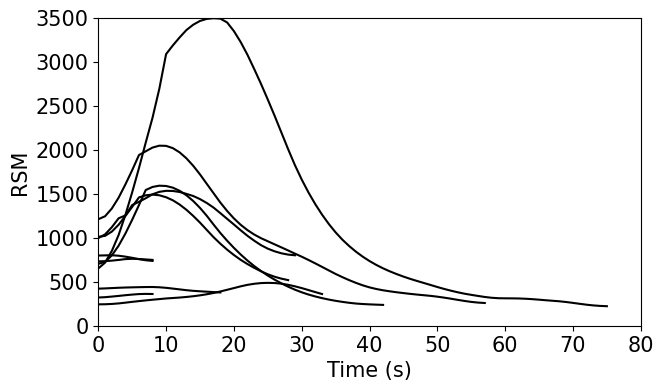

In [19]:
import math
import random
import matplotlib.pyplot as plt

def round_up_to_nearest(value, base):
    return base * math.ceil(value / base)

def plot_random_time_series(data, xdiv, ydiv,saveno,num_plots=10):
    # Set a random seed (optional but ensures reproducibility)
    random.seed()

    # Get a random sample of indices
    indices = random.sample(range(len(data)), num_plots)

    # Initialize lists to hold all x and y values for finding max values
    all_x_values = []
    all_y_values = []

    plt.figure(figsize=(7, 4)) 

    # Plot the selected time series
    for idx in indices:
        time_series, _ = data[idx]  # Extract time series from tuple
        plt.plot(time_series, color='black')
        all_x_values.extend(range(len(time_series)))
        all_y_values.extend(time_series)

        # Set axis limits
    max_x = round_up_to_nearest(max(all_x_values), xdiv)
    max_y = round_up_to_nearest(max(all_y_values), ydiv)
    # Set axis limits
    plt.xlim(0, max_x)
    plt.ylim(0, max_y)

    plt.xlabel('Time (s)', fontsize=15)
    plt.ylabel('RSM', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig(rf'C:\Users\kayna\OneDrive\Pictures\python figures/data_for_model_f{saveno}.png', format='png',bbox_inches='tight',dpi=250)
    plt.show()

# Example usage
# Assuming your array of tuples is named 'data'
plot_random_time_series(segmented_data,xdiv=10,ydiv=500,saveno=1)

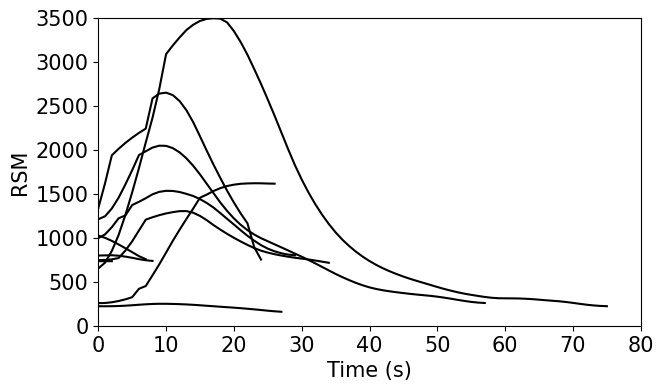

In [51]:
plot_random_time_series(segmented_data,xdiv=10,ydiv=500,saveno=2)

In [54]:
def remove_tuples_with_long_series(data, max_length=20):
    filtered_data = [tup for tup in data if len(tup[0]) >= max_length]
    return filtered_data


filtered_data = remove_tuples_with_long_series(segmented_data)


In [55]:
import numpy as np
import pandas as pd

def has_local_maxima(time_series):
    local_maxima_indices = np.where((time_series[:-2] < time_series[1:-1]) & (time_series[1:-1] > time_series[2:]))[0] + 1
    return len(local_maxima_indices) > 0

def is_decreasing(series):
    return all(x > y for x, y in zip(series, series[1:]))

def is_increasing(series):
    return all(x < y for x, y in zip(series, series[1:]))

def remove_invalid_tuples(data):
    filtered_data2 = []
    
    for time_series, label in data:
        if len(time_series) >= 15 and is_decreasing(time_series[:15]):
            continue
        if len(time_series) >= 9 and is_increasing(time_series[-9:]):
            continue
        if not has_local_maxima(time_series):
            continue
        filtered_data2.append((time_series, label))
    
    return filtered_data2



filtered_data2 = remove_invalid_tuples(original_data)


In [56]:
print(len(filtered_data))
print(len(filtered_data2))

21
48


In [57]:
from collections import Counter

def counttargets(insert_tuple):
    targets = [target for _, target in insert_tuple]
# Count the occurrences of each target
    target_counts = Counter(targets)
# Print the counts
    for target, count in target_counts.items():
        print(f"Target {target}: {count} occurrences")

counttargets(filtered_data)
counttargets(filtered_data2)

Target 2: 14 occurrences
Target 3: 7 occurrences
Target 2: 34 occurrences
Target 3: 14 occurrences


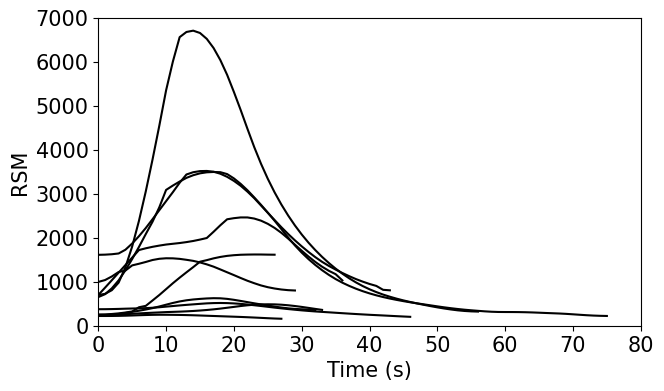

In [61]:
plot_random_time_series(filtered_data,xdiv=10,ydiv=500,saveno=20)

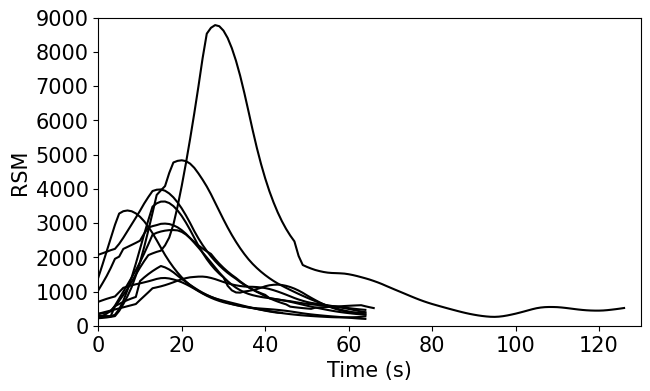

In [62]:
plot_random_time_series(filtered_data2,xdiv=10,ydiv=500,saveno=21)

In [63]:
def find_first_peak(time_series):
    # Find the index of the first peak in the time series
    for i in range(1, len(time_series) - 1):
        if time_series[i] > time_series[i - 1] and time_series[i] > time_series[i + 1]:
            return i
    return None  # Return None if no peak is found

def remove_invalid_tuples(series):
    valid_series = []
    for time_series, target in series:
        first_peak_index = find_first_peak(time_series)
        if first_peak_index is None:
            # No peak found, skip this tuple
            continue
        if time_series[0] <= 0.7 * time_series[first_peak_index]:
            # First value is more than half of the peak value, keep this tuple
            valid_series.append((time_series, target))
    return valid_series


# Remove invalid tuples
valid_series1 = remove_invalid_tuples(filtered_data)
valid_series2 = remove_invalid_tuples(filtered_data2)

In [64]:
print(len(valid_series1))
print(len(valid_series2))

19
44


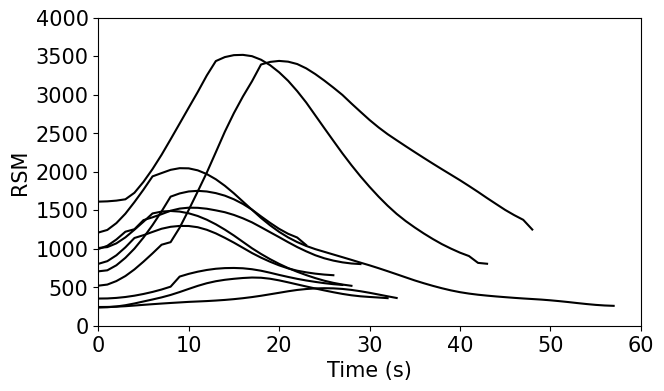

In [65]:
plot_random_time_series(valid_series1,xdiv=10,ydiv=500,saveno=3)

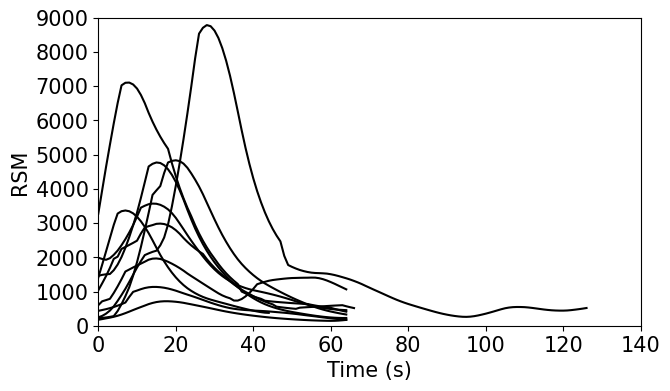

In [68]:
plot_random_time_series(valid_series2,xdiv=20,ydiv=500,saveno=4)

In [69]:
import numpy as np
from scipy.optimize import curve_fit, OptimizeWarning
from scipy.stats import exponnorm, entropy, kurtosis, skew
from sklearn.metrics import auc
import pandas as pd
from numpy.polynomial.polynomial import Polynomial

def detect_peaks(signal):
    from scipy.signal import find_peaks
    peaks, _ = find_peaks(signal)
    return peaks

def fit_exponentially_modified_gaussian(x, y):
    def exponential_gaussian(x, mu, sigma, lambd, A):
        return A * exponnorm.pdf(x - mu, lambd, 0, sigma)

    if len(x) < 4:
        return [np.mean(x), np.std(x), 1, max(y)]

    p0 = [np.mean(x), np.std(x), 1, max(y)]
    try:
        popt, _ = curve_fit(exponential_gaussian, x, y, p0=p0)
    except RuntimeError as e:
        print(f"RuntimeError: {e}")
        popt = p0
    except OptimizeWarning as e:
        print(f"OptimizeWarning: {e}")
        popt = p0

    return popt

def normalize_data(x, y):
    x_norm = (x - x.min()) / (x.max() - x.min())
    y_norm = (y - y.min()) / (y.max() - y.min())
    return x_norm, y_norm

def calculate_peak_statistics(signal, peaks, initiation_point, after_peak_ratio):
    if len(peaks) == 0:
        return None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None
    
    first_peak = peaks[0]
    initiation_index = np.argmax(signal > initiation_point * max(signal))  # Index of initiation point
    
    # Calculate slope of the line from the beginning to the first peak
    slope_to_peak = (signal[first_peak] - signal[initiation_index]) / (first_peak - initiation_index)
    
    # Divide the time series into two sections: before and after the peak
    after_peak_threshold = after_peak_ratio * signal[first_peak]
    division_index = next((i for i, v in enumerate(signal[first_peak:]) if v <= after_peak_threshold), None)
    
    if division_index is None:
        return None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None
    
    division_index += first_peak
    first_segment = signal[:division_index]
    second_segment = signal[division_index:]
    
    # Calculate the slope from the first peak to the division index
    slope_after_peak = (signal[division_index] - signal[first_peak]) / (division_index - first_peak)
    
    # Fit an exponentially modified Gaussian distribution to the second section
    x_after_peak = np.arange(len(second_segment))
    y_after_peak = second_segment
    mu, sigma, lambd, A = fit_exponentially_modified_gaussian(x_after_peak, y_after_peak)
    
    # Calculate the duration of each section and take their ratios
    duration_before_peak = len(first_segment)
    duration_after_peak = len(second_segment)
    duration_ratio = duration_before_peak / duration_after_peak
    
    # Calculate the area under each time series section and calculate their ratio
    area_first_segment = auc(np.arange(len(first_segment)), first_segment)
    area_second_segment = auc(np.arange(len(second_segment)), second_segment)
    area_ratio = area_first_segment / area_second_segment

    # Calculate standard deviation, skewness, and kurtosis for the segment around the first peak
    segment = signal[initiation_index:division_index]
    std_segment = np.std(segment)
    skewness_segment = skew(segment)
    kurtosis_segment = kurtosis(segment)

    # Normalize data for polynomial fitting
    x_before_peak = np.arange(initiation_index, first_peak)
    y_before_peak = signal[initiation_index:first_peak]
    x_norm_before_peak, y_norm_before_peak = normalize_data(x_before_peak, y_before_peak)

    x_after_peak = np.arange(first_peak, division_index)
    y_after_peak = signal[first_peak:division_index]
    x_norm_after_peak, y_norm_after_peak = normalize_data(x_after_peak, y_after_peak)

    # Calculate polynomial fits
    poly_before_peak = Polynomial.fit(x_norm_before_peak, y_norm_before_peak, 3)
    poly_after_peak = Polynomial.fit(x_norm_after_peak, y_norm_after_peak, 3)
    
    # Divide the segment before division index into four equal parts and calculate area ratios
    segment_length = division_index - initiation_index
    quarter_length = segment_length // 4
    areas_before_division = [
        auc(np.arange(initiation_index, initiation_index + quarter_length), signal[initiation_index:initiation_index + quarter_length]),
        auc(np.arange(initiation_index + quarter_length, initiation_index + 2 * quarter_length), signal[initiation_index + quarter_length:initiation_index + 2 * quarter_length]),
        auc(np.arange(initiation_index + 2 * quarter_length, initiation_index + 3 * quarter_length), signal[initiation_index + 2 * quarter_length:initiation_index + 3 * quarter_length]),
        auc(np.arange(initiation_index + 3 * quarter_length, division_index), signal[initiation_index + 3 * quarter_length:division_index])
    ]
    area_ratios_before_division = [areas_before_division[i] / areas_before_division[j] for i in range(len(areas_before_division)) for j in range(len(areas_before_division)) if i != j]
    
    # Divide the segment after division index into four equal parts and calculate area ratios
    segment_after_length = len(signal) - division_index
    quarter_after_length = segment_after_length // 4
    areas_after_division = [
        auc(np.arange(division_index, division_index + quarter_after_length), signal[division_index:division_index + quarter_after_length]),
        auc(np.arange(division_index + quarter_after_length, division_index + 2 * quarter_after_length), signal[division_index + quarter_after_length:division_index + 2 * quarter_after_length]),
        auc(np.arange(division_index + 2 * quarter_after_length, division_index + 3 * quarter_after_length), signal[division_index + 2 * quarter_after_length:division_index + 3 * quarter_after_length]),
        auc(np.arange(division_index + 3 * quarter_after_length, len(signal)), signal[division_index + 3 * quarter_after_length:])
    ]
    area_ratios_after_division = [areas_after_division[i] / areas_after_division[j] for i in range(len(areas_after_division)) for j in range(len(areas_after_division)) if i != j]
    
    # Polynomial fits to the four segments after division index
    poly_fits_after_division = [
        Polynomial.fit(*normalize_data(np.arange(division_index, division_index + quarter_after_length), signal[division_index:division_index + quarter_after_length]), 3),
        Polynomial.fit(*normalize_data(np.arange(division_index + quarter_after_length, division_index + 2 * quarter_after_length), signal[division_index + quarter_after_length:division_index + 2 * quarter_after_length]), 3),
        Polynomial.fit(*normalize_data(np.arange(division_index + 2 * quarter_after_length, division_index + 3 * quarter_after_length), signal[division_index + 2 * quarter_after_length:division_index + 3 * quarter_after_length]), 3),
        Polynomial.fit(*normalize_data(np.arange(division_index + 3 * quarter_after_length, len(signal)), signal[division_index + 3 * quarter_after_length:]), 3)
    ]

    # Extract coefficients from polynomial fits
    poly_coefficients_second_segment = []
    for poly in poly_fits_after_division:
        poly_coefficients_second_segment.extend(poly.convert().coef)

    # Combine all features into a single list
    features = [
        slope_to_peak, slope_after_peak,
        mu, sigma, lambd, A, duration_ratio, area_ratio, std_segment, skewness_segment, kurtosis_segment,
        *poly_before_peak.convert().coef, *poly_after_peak.convert().coef, *area_ratios_before_division,
        *poly_coefficients_second_segment, *area_ratios_after_division
    ]
    
    return features

In [70]:
alld=[valid_series1, valid_series2]
combined_series = pd.Series(zip(valid_series1, valid_series2))
alld

[[(array([1334.563697, 1619.397421, 1936.620083, 2010.638704, 2077.255463,
          2137.210547, 2191.170121, 2239.733739, 2583.377843, 2637.65886 ,
          2648.622254, 2620.319119, 2552.384453, 2448.527446, 2312.730463,
          2152.175686, 1988.020875, 1829.718569, 1678.569205, 1533.843955,
          1399.834446, 1276.008649, 1163.851999,  891.434303,  751.826217]),
   2),
  (array([ 703.149913,  725.310958,  799.205765,  909.533698, 1047.376106,
          1204.166966, 1371.035559, 1542.274898, 1576.975595, 1591.317256,
          1588.021294, 1568.688722, 1533.031658, 1482.511348, 1417.190297,
          1338.770554, 1249.061129, 1149.552301, 1053.924928,  966.089107,
           884.724713,  809.262645,  740.474544,  677.789101,  621.286844,
           570.059033,  523.598547,  481.623757,  443.596874,  409.491857,
           379.854524,  354.290584,  332.462569,  313.590742,  297.151254,
           282.988992,  270.956552,  260.541142,  252.083817,  246.664838,
           242.6

In [115]:
# Initialize an empty list to store peak statistics and target labels
peak_data = []
all_signals=[]
# Loop over each sublist containing signals and targets
for sublist in alld:
    for signal, target in sublist:
        try:
            # Detect peaks in the original signal
            peaks = detect_peaks(signal)
            all_signals.append((signal,target))
            # Calculate peak statistics for the original signal
            peak_stats1 = calculate_peak_statistics(signal, peaks, initiation_point=0.5, after_peak_ratio=0.5)
            
            # Calculate peak statistics for the squared signal (signal^2)
            peak_stats2 = calculate_peak_statistics(signal**2, peaks, initiation_point=0.5, after_peak_ratio=0.5)
            #peak_stats2=[]
            
            # Check if both peak_stats contain valid data
            if peak_stats1 is not None and peak_stats2 is not None:
                # Combine peak statistics into a single list for the row
                row_data = []
                row_data.extend(peak_stats1)  # Append all features from peak_stats1
                row_data.extend(peak_stats2)  # Append all features from peak_stats2
                row_data.append(target)  # Append the target label
                
                # Append row_data to peak_data
                peak_data.append(row_data)
                
        except Exception as e:
            print(f"Skipping signal due to error: {e}")

# Create column names dynamically based on the number of features
num_features = len(peak_stats1) + len(peak_stats2)
columns = [f'Feature_{i+1}' for i in range(num_features)]
columns.append('Target')  # Add target column

# Create a DataFrame from peak_data
df = pd.DataFrame(peak_data, columns=columns)



C:\Users\kayna\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Skipping signal due to error: At least 2 points are needed to compute area under curve, but x.shape = 1
Skipping signal due to error: At least 2 points are needed to compute area under curve, but x.shape = 1
Skipping signal due to error: At least 2 points are needed to compute area under curve, but x.shape = 1
Skipping signal due to error: At least 2 points are needed to compute area under curve, but x.shape = 0
Skipping signal due to error: At least 2 points are needed to compute area under curve, but x.shape = 1
Skipping signal due to error: At least 2 points are needed to compute area under curve, but x.shape = 1


C:\Users\kayna\anaconda3\Lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
C:\Users\kayna\anaconda3\Lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
C:\Users\kayna\anaconda3\Lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


Skipping signal due to error: At least 2 points are needed to compute area under curve, but x.shape = 0


C:\Users\kayna\anaconda3\Lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
C:\Users\kayna\anaconda3\Lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
C:\Users\kayna\anaconda3\Lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
C:\Users\kayna\AppData\Local\Temp\ipykernel_13516\1608662215.py:33: RuntimeWarning: invalid value encountered in divide
  x_norm = (x - x.min()) / (x.max() - x.min())
C:\Users\kayna\AppData\Local\Temp\ipykernel_13516\1608662215.py:34: RuntimeWarning: invalid value encountered in divide
  y_norm = (y - y.min()) / (y.max() - y.min())


Skipping signal due to error: SVD did not converge in Linear Least Squares


C:\Users\kayna\anaconda3\Lib\site-packages\numpy\polynomial\polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.


In [116]:
all_signals

[(array([1334.563697, 1619.397421, 1936.620083, 2010.638704, 2077.255463,
         2137.210547, 2191.170121, 2239.733739, 2583.377843, 2637.65886 ,
         2648.622254, 2620.319119, 2552.384453, 2448.527446, 2312.730463,
         2152.175686, 1988.020875, 1829.718569, 1678.569205, 1533.843955,
         1399.834446, 1276.008649, 1163.851999,  891.434303,  751.826217]),
  2),
 (array([ 703.149913,  725.310958,  799.205765,  909.533698, 1047.376106,
         1204.166966, 1371.035559, 1542.274898, 1576.975595, 1591.317256,
         1588.021294, 1568.688722, 1533.031658, 1482.511348, 1417.190297,
         1338.770554, 1249.061129, 1149.552301, 1053.924928,  966.089107,
          884.724713,  809.262645,  740.474544,  677.789101,  621.286844,
          570.059033,  523.598547,  481.623757,  443.596874,  409.491857,
          379.854524,  354.290584,  332.462569,  313.590742,  297.151254,
          282.988992,  270.956552,  260.541142,  252.083817,  246.664838,
          242.630407,  239.518

2


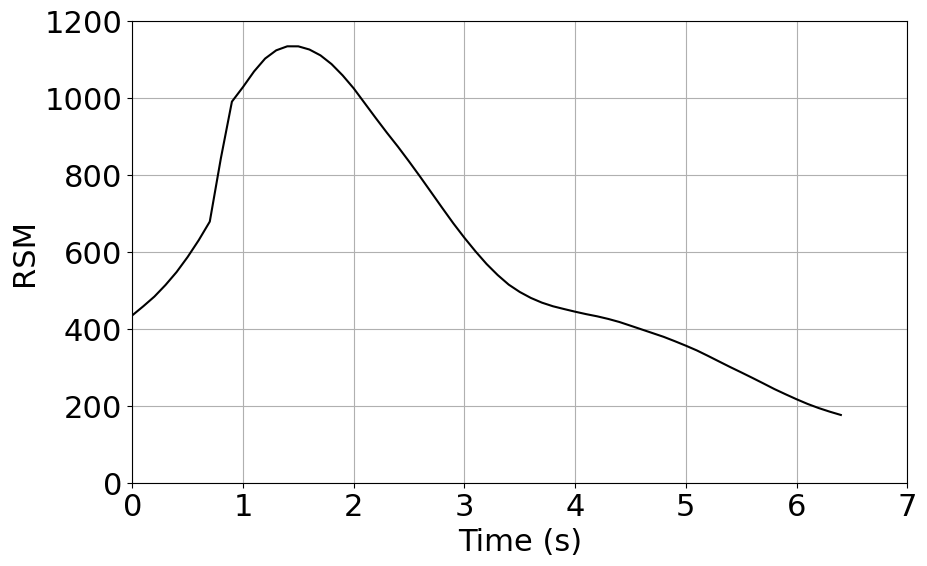

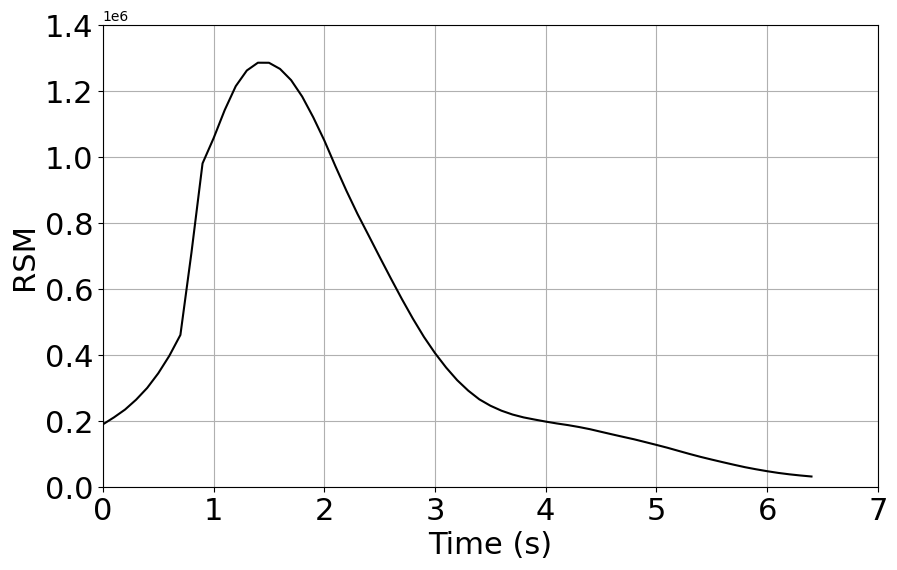

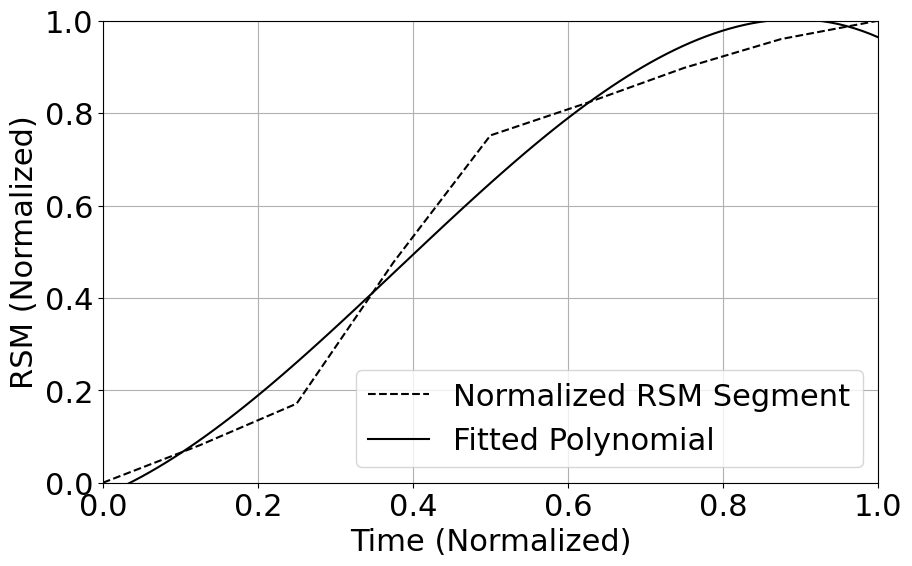

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Selecting a specific segment from all_signals
signal_to_vis,target_val = all_signals[29]
print(target_val)
# Detect peaks in the selected segment
peaks = detect_peaks(signal_to_vis)
initiation_point,after_peak_ratio = 0.5,0.5

# Calculate statistics and polynomial fits for the peaks
features = calculate_peak_statistics(signal_to_vis, peaks, initiation_point, after_peak_ratio)

# Determine the division index between segments
first_peak_vis = peaks[0]
initiation_index_vis = np.argmax(signal_to_vis > initiation_point * max(signal_to_vis))
division_index_vis = first_peak_vis

# Normalize data for polynomial fitting
x_before_peak_v = np.arange(initiation_index_vis, division_index_vis)
y_before_peak_v = signal_to_vis[initiation_index_vis:division_index_vis]
x_norm_before_peak_v, y_norm_before_peak_v = normalize_data(x_before_peak_v, y_before_peak_v)

# Fit polynomials to the segment
poly_before_peak_v = Polynomial.fit(x_norm_before_peak_v, y_norm_before_peak_v, 3)

# Plotting the entire signal (Figure 1)
plt.figure(figsize=(10, 6))

# Plot the entire original signal
plt.plot(np.arange(len(signal_to_vis))/10,signal_to_vis, color='black',)

plt.xlabel('Time (s)',fontsize=22)
plt.ylabel('RSM',fontsize=22)
plt.grid(True)
plt.xlim(0,7)
plt.ylim(0,1200)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.savefig(r'C:\Users\kayna\OneDrive\Pictures\python figures/vis_tada1.png', format='png',bbox_inches='tight',dpi=250)
plt.show()


plt.figure(figsize=(10, 6))

# Plot the entire original signal
plt.plot(np.arange(len(signal_to_vis))/10,signal_to_vis**2, color='black',)

plt.xlabel('Time (s)',fontsize=22)
plt.ylabel('RSM',fontsize=22)
plt.grid(True)
plt.xlim(0,7)
plt.ylim(0,1.4e6)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.savefig(r'C:\Users\kayna\OneDrive\Pictures\python figures/vis_tada2.png',format='png',bbox_inches='tight',dpi=250)
plt.show()

# Plotting the normalized segment with fitted polynomial (Figure 2)
plt.figure(figsize=(10, 6))

# Plot the normalized segment
plt.plot(x_norm_before_peak_v, y_norm_before_peak_v, label='Normalized RSM Segment', color='black', linestyle='--')

# Plot the fitted polynomial before the division index (normalized)
x_vals_before_peak = np.linspace(x_norm_before_peak_v.min(), x_norm_before_peak_v.max(), 100)
y_vals_before_peak = poly_before_peak_v(x_vals_before_peak)
plt.plot(x_vals_before_peak, y_vals_before_peak, label='Fitted Polynomial', color='black',linestyle='-')

plt.xlabel('Time (Normalized)',fontsize=22)
plt.ylabel('RSM (Normalized)',fontsize=22)
plt.grid(True)
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.savefig(r'C:\Users\kayna\OneDrive\Pictures\python figures/vis_tada3.png', format='png',bbox_inches='tight',dpi=250)
plt.show()



In [73]:
# Drop rows with any NaN values
df.dropna(inplace=True)
# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)
print(df)

     Feature_1   Feature_2   Feature_3   Feature_4     Feature_5  \
0   113.158784  -65.449439  -33.547836   25.113735  1.743946e-04   
1    49.682257  -40.738390   -0.540334   11.030183  3.403894e-04   
2    92.892901  -70.093641  -78.658034   13.955034  1.561924e+00   
3   149.903313 -122.716475    1.717541    8.173010  1.556989e-04   
4   154.815992 -140.996960    0.081850   16.555293  1.325064e-04   
5   488.283651 -306.139316    0.178929    9.694229  6.272976e-05   
6   230.829497 -197.751989    1.109023   13.983080  4.361939e-05   
7    58.474022  -25.534669   -6.586264   19.557770  1.529795e-03   
8   264.304278 -151.270212    0.374900   12.922535  3.405581e-04   
9   188.989170 -133.532789   -8.111413   32.762418  2.430931e-04   
10   43.446796  -50.548424    5.311235   16.651572  9.156117e-05   
11  186.064669 -101.182025    6.550538   38.933974  8.148117e-05   
12   59.370277  -13.115194    3.499700   14.565242  2.174199e-03   
13   99.621033  -93.742864    4.512670   16.7459

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Confusion Matrix:
[[7 0]
 [3 0]]

Classification Report:
              precision    recall  f1-score   support

         2.0       0.70      1.00      0.82         7
         3.0       0.00      0.00      0.00         3

    accuracy                           0.70        10
   macro avg       0.35      0.50      0.41        10
weighted avg       0.49      0.70      0.58        10


Accuracy: 0.7


C:\Users\kayna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kayna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kayna\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


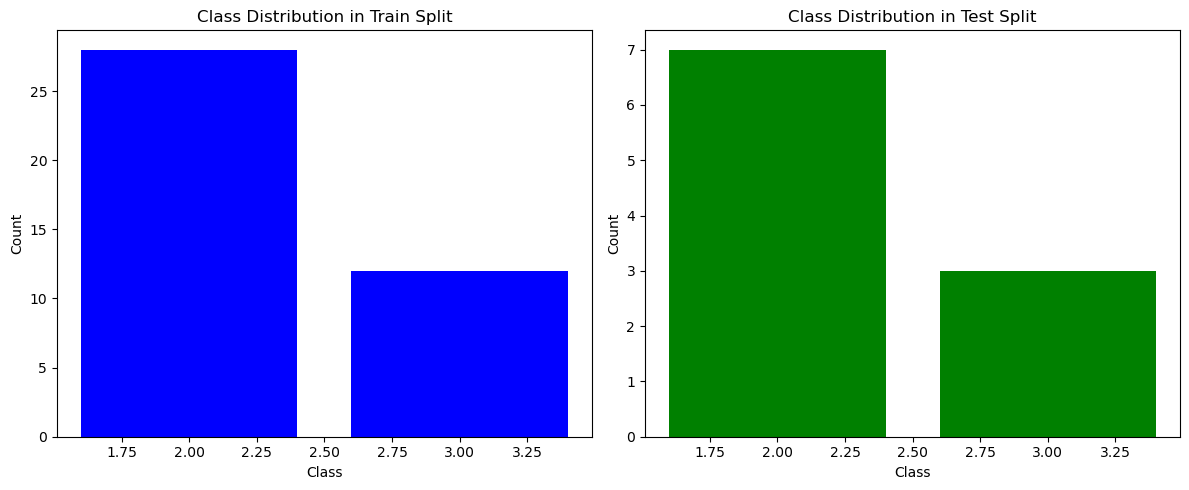

In [74]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import joblib
import numpy as np
import matplotlib.pyplot as plt

# Split the data into features and target
#X = df.drop(columns=['Target'])
X = df.iloc[:, :11] 
y = df['Target']

# Initialize StratifiedKFold to ensure at least 20% representation of each class in the test set
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)

# Split the data into train and test sets
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Check the distribution of classes in the test split
    if all(y_test.value_counts(normalize=True) >= 0.2):
        break

# Define a parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Get the best estimator
best_rf = grid_search.best_estimator_

# Save the trained model to a file
joblib.dump(best_rf, 'random_forest_model_RSM_59f.pkl')

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

# Calculate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Display the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"\nAccuracy: {accuracy}")

# Plot the number of class labels in the train and test splits
unique, counts_train = np.unique(y_train, return_counts=True)
unique, counts_test = np.unique(y_test, return_counts=True)
train_counts = dict(zip(unique, counts_train))
test_counts = dict(zip(unique, counts_test))

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].bar(train_counts.keys(), train_counts.values(), color='blue')
ax[0].set_title('Class Distribution in Train Split')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Count')

ax[1].bar(test_counts.keys(), test_counts.values(), color='green')
ax[1].set_title('Class Distribution in Test Split')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Perform t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a meshgrid for plotting decision boundaries
h = .02  # step size in the mesh
x_min, x_max = X_tsne[:, 0].min() - 1, X_tsne[:, 0].max() + 1
y_min, y_max = X_tsne[:, 1].min() - 1, X_tsne[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Train the best RandomForestClassifier on the t-SNE data
best_rf_tsne = RandomForestClassifier(**best_params, random_state=42)
best_rf_tsne.fit(X_tsne, y)

# Predict classifications for the meshgrid
Z = best_rf_tsne.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


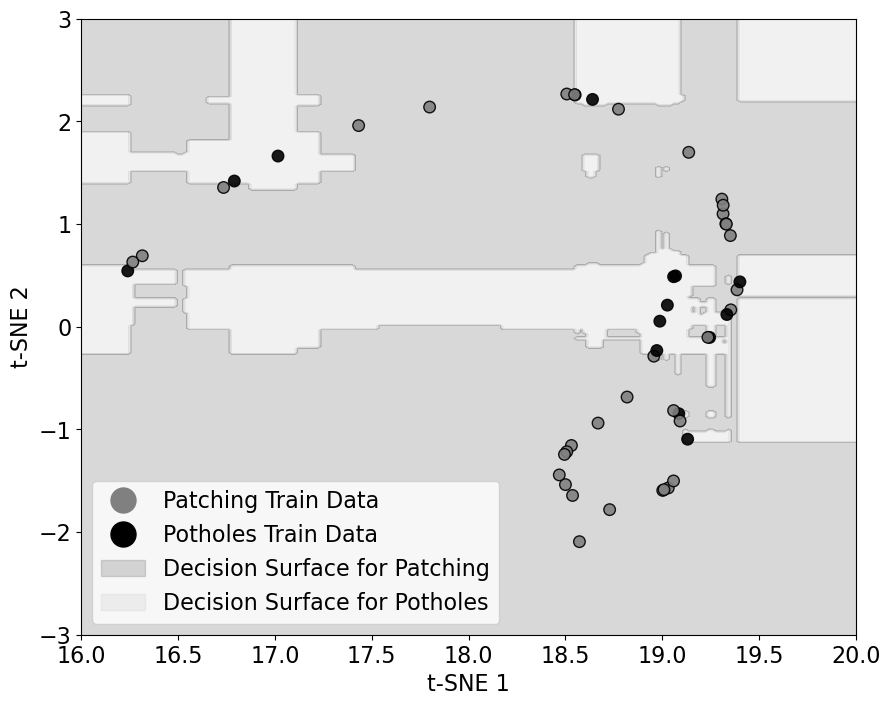

In [75]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Define custom colors for each target class
colors_points = ['grey', 'black']  # Colors for data points for target 2 and target 3
cmap_points = ListedColormap(colors_points)

colors_surface = ['grey', 'lightgrey']  # Colors for decision surface for target 2 and target 3
cmap_surface = ListedColormap(colors_surface)

# Plot the decision boundary with custom colors and no colorbar
plt.figure(figsize=(10, 8))
contour = plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_surface)

# Plot the data points
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=cmap_points, edgecolor='k', alpha=0.9, s=69)

# Create custom legend handles
patching_points = mlines.Line2D([], [], color='grey', marker='o', linestyle='None', markersize=10, label='Patching Train Data')
potholes_points = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=10, label='Potholes Train Data')
patching_surface = mpatches.Patch(color='grey', alpha=0.3, label='Decision Surface for Patching')
potholes_surface = mpatches.Patch(color='lightgrey', alpha=0.3, label='Decision Surface for Potholes')

# Add the legend
plt.legend(handles=[patching_points, potholes_points, patching_surface, potholes_surface], prop={'size': 16}, markerscale=1.8)

plt.xlabel('t-SNE 1', fontsize=16)
plt.ylabel('t-SNE 2', fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(-3,3)
plt.xlim(16,20)

# Save the plot
plt.savefig(r'C:\Users\kayna\OneDrive\Pictures\python figures/tsne_11f.png', format='png')
plt.show()


Number of components to explain 95% variance: 19


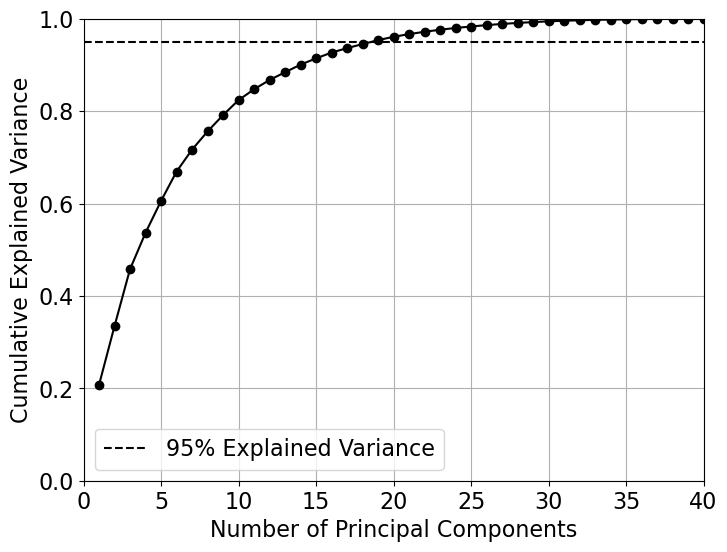

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Confusion Matrix:
[[7 0]
 [2 1]]

Classification Report:
              precision    recall  f1-score   support

         2.0       0.78      1.00      0.88         7
         3.0       1.00      0.33      0.50         3

    accuracy                           0.80        10
   macro avg       0.89      0.67      0.69        10
weighted avg       0.84      0.80      0.76        10


Accuracy: 0.8


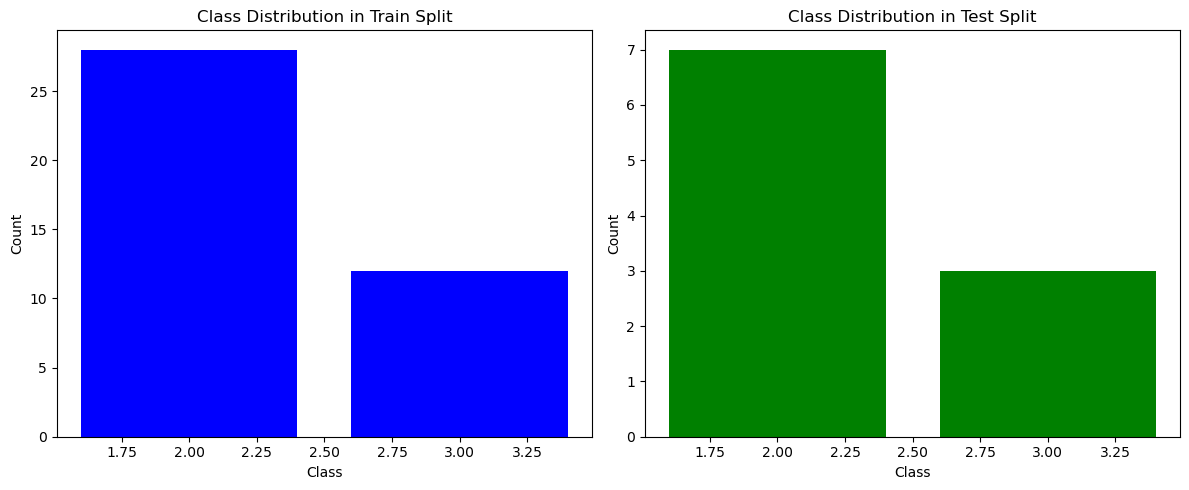

In [100]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import joblib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

# Assuming df is already defined and has a 'Target' column

# Split the data into features and target
X = df.drop(columns=['Target'])
y = df['Target']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize StratifiedKFold to ensure at least 20% representation of each class in the test set
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=None)

# Define a parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV within the StratifiedKFold loop to tune RandomForestClassifier
for train_index, test_index in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Check the distribution of classes in the test split
    if all(y_test.value_counts(normalize=True) >= 0.2):
        # Perform PCA for feature reduction
        pca = PCA()
        X_train_pca = pca.fit_transform(X_train)
        
        # Calculate the cumulative explained variance ratio
        cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
        
        # Determine the number of components required to explain at least 95% of the variance
        n_components_95_variance = np.argmax(cumulative_explained_variance >= 0.95) + 1
        
        print(f"Number of components to explain 95% variance: {n_components_95_variance}")
        
        # Plot the cumulative explained variance ratio
        plt.figure(figsize=(8, 6))
        plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o',color='black')
        plt.axhline(y=0.95, color='black', linestyle='--', label='95% Explained Variance')
        plt.legend(fontsize=16)
        plt.grid(True)
        plt.xlabel('Number of Principal Components', fontsize=16)
        plt.ylabel('Cumulative Explained Variance', fontsize=16)

        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.ylim(0, 1)
        plt.xlim(0, 40)

        # Save the plot (optional)
        plt.savefig(r'C:\Users\kayna\OneDrive\Pictures\python figures/PCA.png', format='png')

        plt.show()


        # Apply PCA with the number of components that explain 95% of the variance
        pca = PCA(n_components=n_components_95_variance)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
        
        # Initialize GridSearchCV
        grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        
        # Fit GridSearchCV on the PCA-transformed data
        grid_search.fit(X_train_pca, y_train)
        
        # Get the best parameters
        best_params = grid_search.best_params_
        print(f"Best Parameters: {best_params}")

        # Get the best estimator
        best_rf = grid_search.best_estimator_

        # Make predictions on the test set
        y_pred = best_rf.predict(X_test_pca)

        # Calculate confusion matrix and classification report
        conf_matrix = confusion_matrix(y_test, y_pred)
        class_report = classification_report(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)

        # Display the results
        print("Confusion Matrix:")
        print(conf_matrix)
        print("\nClassification Report:")
        print(class_report)
        print(f"\nAccuracy: {accuracy}")

        # Optionally, plot the number of class labels in the train and test splits
        unique, counts_train = np.unique(y_train, return_counts=True)
        unique, counts_test = np.unique(y_test, return_counts=True)
        train_counts = dict(zip(unique, counts_train))
        test_counts = dict(zip(unique, counts_test))

        fig, ax = plt.subplots(1, 2, figsize=(12, 5))

        ax[0].bar(train_counts.keys(), train_counts.values(), color='blue')
        ax[0].set_title('Class Distribution in Train Split')
        ax[0].set_xlabel('Class')
        ax[0].set_ylabel('Count')

        ax[1].bar(test_counts.keys(), test_counts.values(), color='green')
        ax[1].set_title('Class Distribution in Test Split')
        ax[1].set_xlabel('Class')
        ax[1].set_ylabel('Count')

        plt.tight_layout()
        plt.show()
        break
        

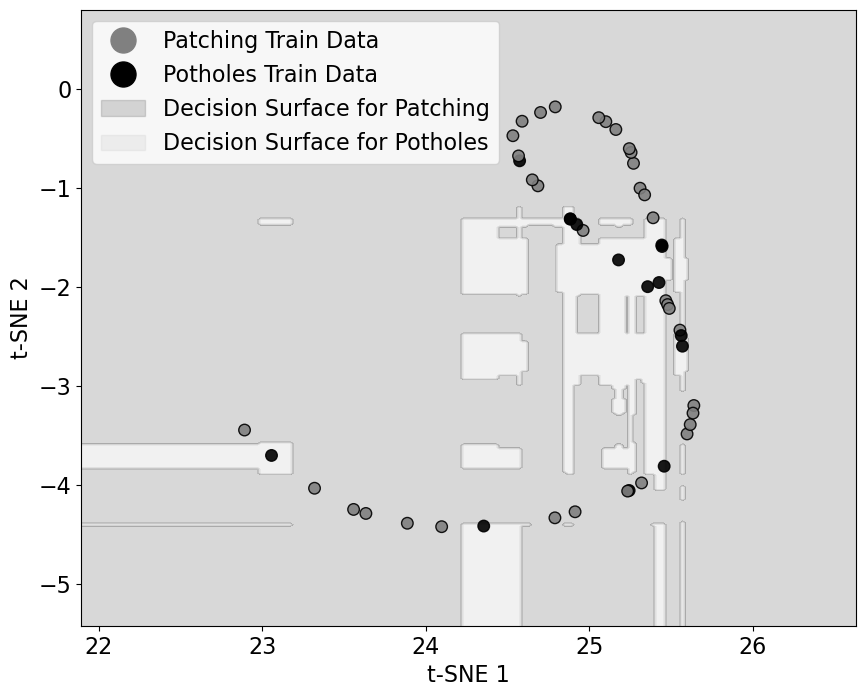

In [89]:
# Perform t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

        # Train the best RandomForestClassifier on the t-SNE data
best_rf_tsne = RandomForestClassifier(**best_params, random_state=42)
best_rf_tsne.fit(X_tsne, y)

h = .02  # step size in the mesh
x_min, x_max = X_tsne[:, 0].min() - 1, X_tsne[:, 0].max() + 1
y_min, y_max = X_tsne[:, 1].min() - 1, X_tsne[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # Predict classifications for the meshgrid
Z = best_rf_tsne.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

        # Define custom colors for each target class
colors_points = ['grey', 'black']  # Colors for data points for target 2 and target 3
cmap_points = ListedColormap(colors_points)

colors_surface = ['grey', 'lightgrey']  # Colors for decision surface for target 2 and target 3
cmap_surface = ListedColormap(colors_surface)

        # Plot the decision boundary with custom colors and no colorbar
plt.figure(figsize=(10, 8))
contour = plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_surface)

        # Plot the data points
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=cmap_points, edgecolor='k', alpha=0.9, s=69)

        # Create custom legend handles
patching_points = mlines.Line2D([], [], color='grey', marker='o', linestyle='None', markersize=10, label='Patching Train Data')
potholes_points = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=10, label='Potholes Train Data')
patching_surface = mpatches.Patch(color='grey', alpha=0.3, label='Decision Surface for Patching')
potholes_surface = mpatches.Patch(color='lightgrey', alpha=0.3, label='Decision Surface for Potholes')

        # Add the legend
plt.legend(handles=[patching_points, potholes_points, patching_surface, potholes_surface], prop={'size': 16}, markerscale=1.8)

plt.xlabel('t-SNE 1', fontsize=16)
plt.ylabel('t-SNE 2', fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
        #plt.ylim(-3, 3)
        #plt.xlim(16, 20)

        # Save the plot (optional)
plt.savefig(r'C:\Users\kayna\OneDrive\Pictures\python figures/tsne_PCA.png', format='png')

plt.show()


